<a href="https://colab.research.google.com/github/Siddhantjp/chatgpt-usage-analysis/blob/main/chatgpt_usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

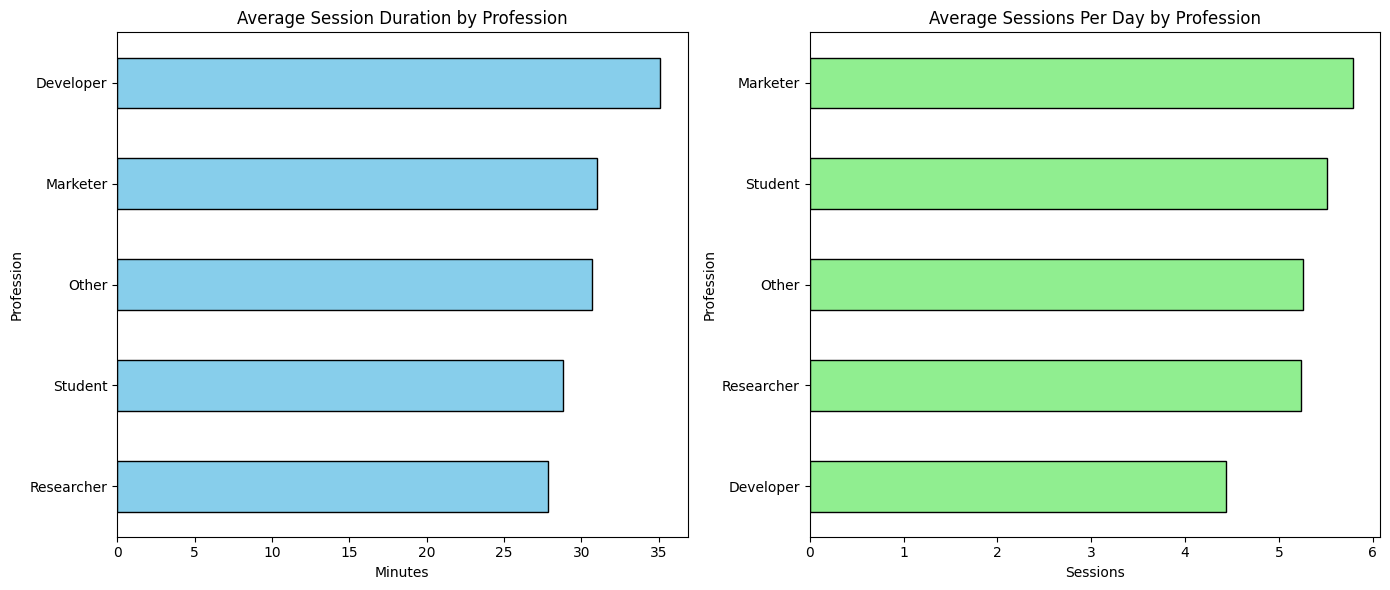

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/DATASETS/chatgpt_usage.csv')

# Calculate average session duration and sessions per day by profession
avg_dependency = data.groupby("Profession")[["Average Session Duration (minutes)", "Sessions Per Day"]].mean()

# Plot dependency as bar charts
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
avg_dependency["Average Session Duration (minutes)"].sort_values().plot(kind="barh", ax=ax[0], color="skyblue", edgecolor="black")
ax[0].set_title("Average Session Duration by Profession")
ax[0].set_xlabel("Minutes")

avg_dependency["Sessions Per Day"].sort_values().plot(kind="barh", ax=ax[1], color="lightgreen", edgecolor="black")
ax[1].set_title("Average Sessions Per Day by Profession")
ax[1].set_xlabel("Sessions")

plt.tight_layout()
plt.show()


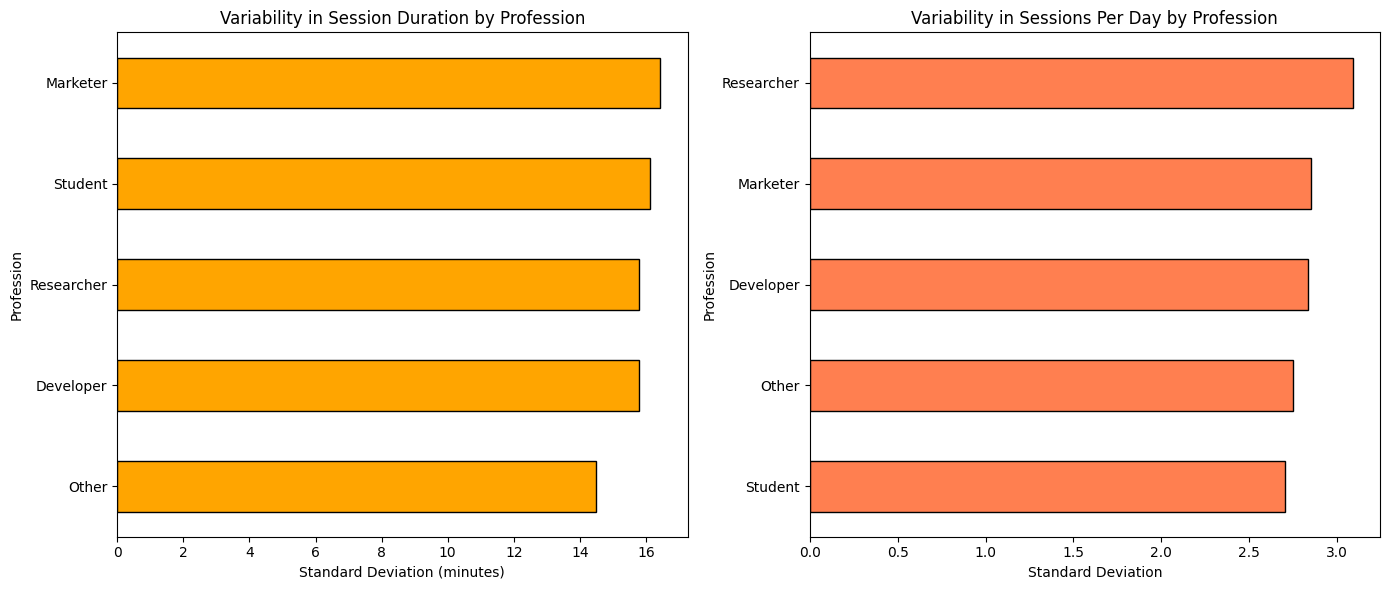

In [3]:
# Calculate standard deviation for dependency metrics
dependency_variability = data.groupby("Profession")[["Average Session Duration (minutes)", "Sessions Per Day"]].std()

# Plot variability as bar charts
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
dependency_variability["Average Session Duration (minutes)"].sort_values().plot(kind="barh", ax=ax[0], color="orange", edgecolor="black")
ax[0].set_title("Variability in Session Duration by Profession")
ax[0].set_xlabel("Standard Deviation (minutes)")

dependency_variability["Sessions Per Day"].sort_values().plot(kind="barh", ax=ax[1], color="coral", edgecolor="black")
ax[1].set_title("Variability in Sessions Per Day by Profession")
ax[1].set_xlabel("Standard Deviation")

plt.tight_layout()
plt.show()


Correlation: -0.10809045717283004, P-Value: 0.12762978152639096


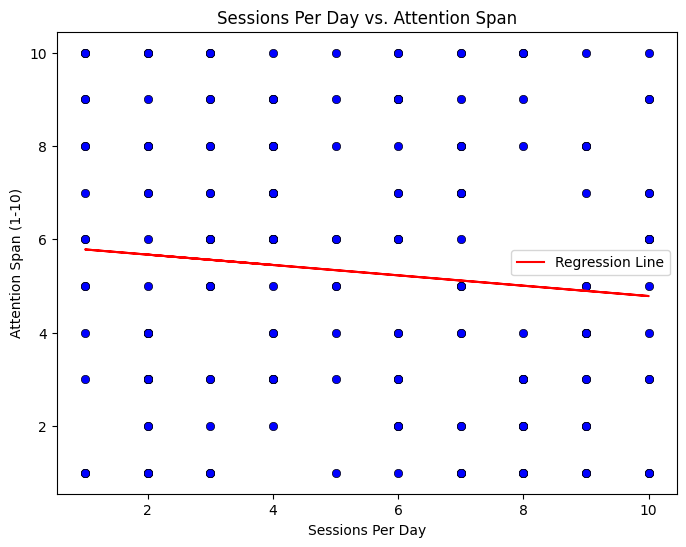

In [4]:
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np

# Correlation analysis
correlation, p_value = pearsonr(data["Sessions Per Day"], data["Attention Span (1-10)"])
print(f"Correlation: {correlation}, P-Value: {p_value}")

# Linear regression
X = data["Sessions Per Day"].values.reshape(-1, 1)
y = data["Attention Span (1-10)"].values
model = LinearRegression()
model.fit(X, y)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data["Sessions Per Day"], y=data["Attention Span (1-10)"], color="blue", edgecolor="black")
plt.plot(data["Sessions Per Day"], model.predict(X), color="red", label="Regression Line")
plt.title("Sessions Per Day vs. Attention Span")
plt.xlabel("Sessions Per Day")
plt.ylabel("Attention Span (1-10)")
plt.legend()
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare data
X = data[["Average Session Duration (minutes)", "Sessions Per Day", "Attention Span (1-10)"]]
y = data["Simulated IQ"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")


Mean Squared Error: 159.5228726139329
Coefficients:
Average Session Duration (minutes): 0.08
Sessions Per Day: -0.57
Attention Span (1-10): 0.14


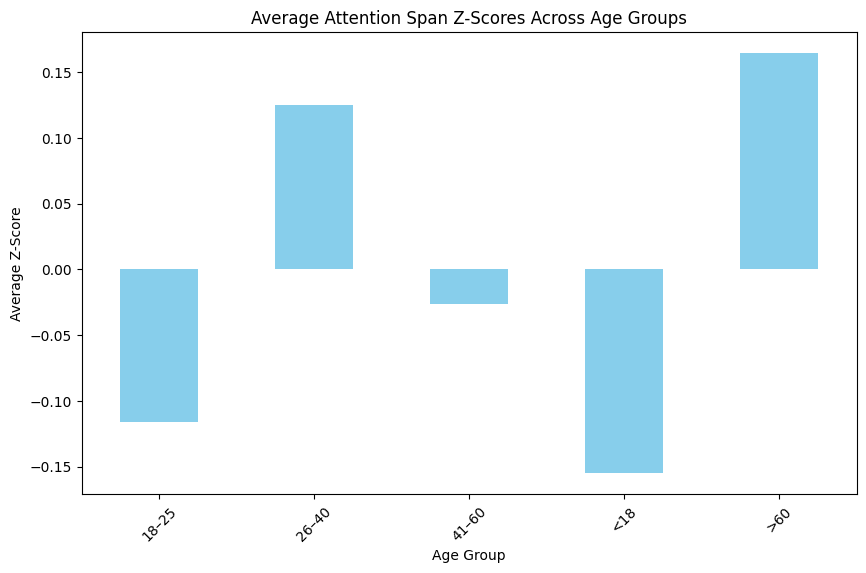

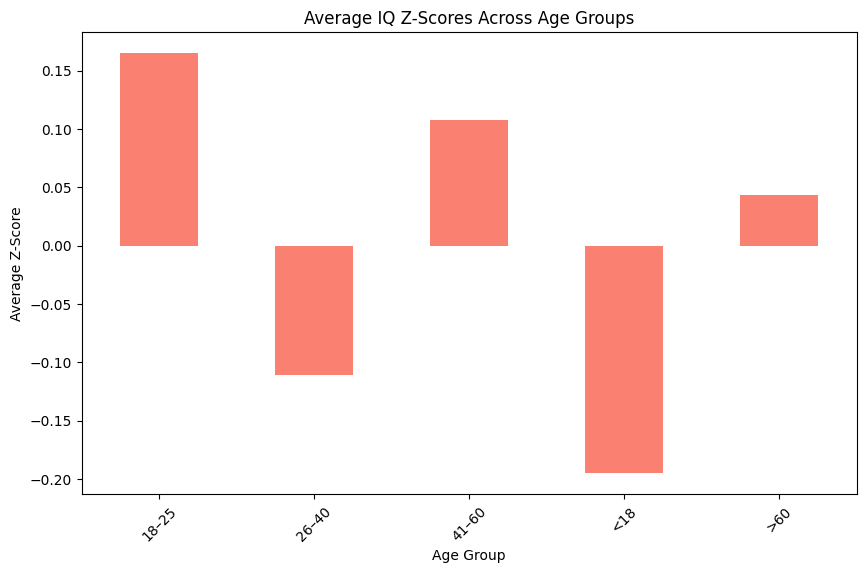

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Calculate z-scores
data["Attention Z-Score"] = zscore(data["Attention Span (1-10)"])
data["IQ Z-Score"] = zscore(data["Simulated IQ"])

# Average Attention Z-Scores per Age Group
attention_means = data.groupby("Age Group")["Attention Z-Score"].mean()

# Average IQ Z-Scores per Age Group
iq_means = data.groupby("Age Group")["IQ Z-Score"].mean()

# Bar plot for Attention Z-Scores
plt.figure(figsize=(10, 6))
attention_means.plot(kind="bar", color="skyblue")
plt.title("Average Attention Span Z-Scores Across Age Groups")
plt.ylabel("Average Z-Score")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.show()

# Bar plot for IQ Z-Scores
plt.figure(figsize=(10, 6))
iq_means.plot(kind="bar", color="salmon")
plt.title("Average IQ Z-Scores Across Age Groups")
plt.ylabel("Average Z-Score")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.show()



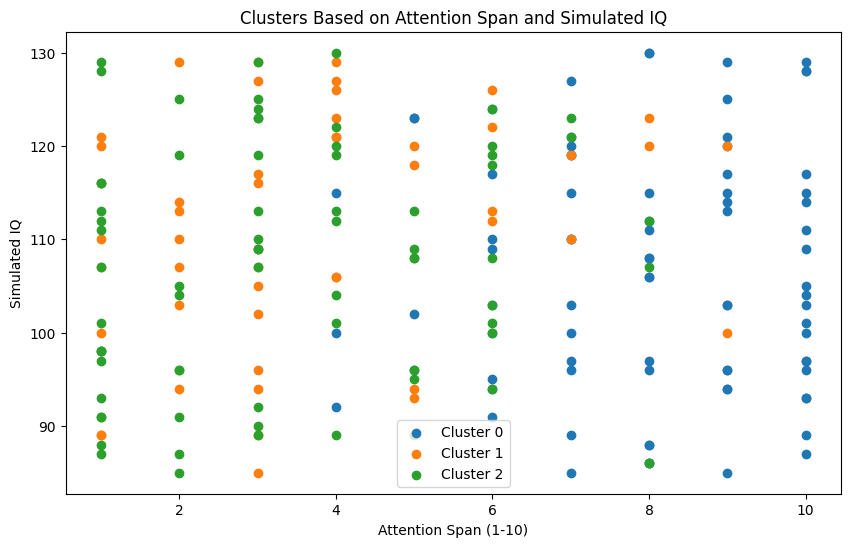

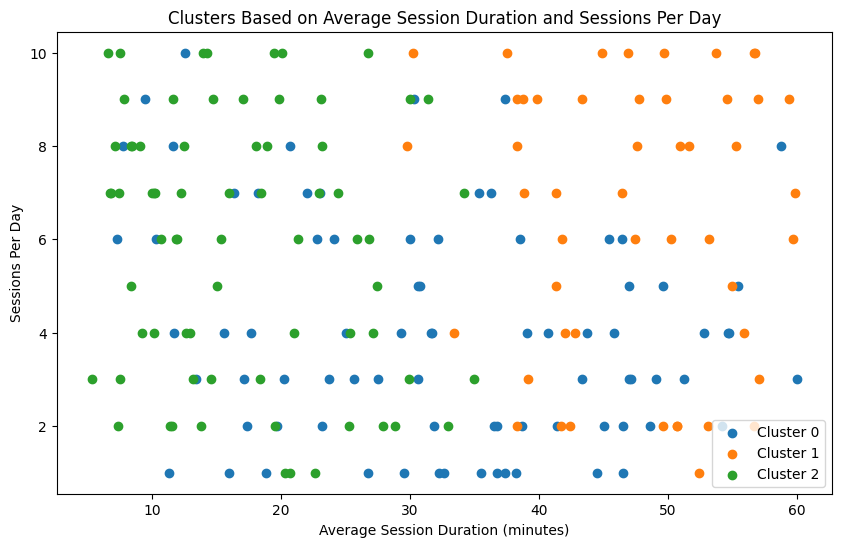

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features
features = data[["Average Session Duration (minutes)", "Sessions Per Day", "Attention Span (1-10)", "Simulated IQ"]]

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data["Cluster"] = kmeans.fit_predict(scaled_features)

# Scatter plot: Attention Span vs. Simulated IQ
plt.figure(figsize=(10, 6))
for cluster in range(3):
    cluster_data = data[data["Cluster"] == cluster]
    plt.scatter(
        cluster_data["Attention Span (1-10)"],
        cluster_data["Simulated IQ"],
        label=f"Cluster {cluster}"
    )

plt.title("Clusters Based on Attention Span and Simulated IQ")
plt.xlabel("Attention Span (1-10)")
plt.ylabel("Simulated IQ")
plt.legend()
plt.show()

# Scatter plot: Average Session Duration vs. Sessions Per Day
plt.figure(figsize=(10, 6))
for cluster in range(3):
    cluster_data = data[data["Cluster"] == cluster]
    plt.scatter(
        cluster_data["Average Session Duration (minutes)"],
        cluster_data["Sessions Per Day"],
        label=f"Cluster {cluster}"
    )

plt.title("Clusters Based on Average Session Duration and Sessions Per Day")
plt.xlabel("Average Session Duration (minutes)")
plt.ylabel("Sessions Per Day")
plt.legend()
plt.show()


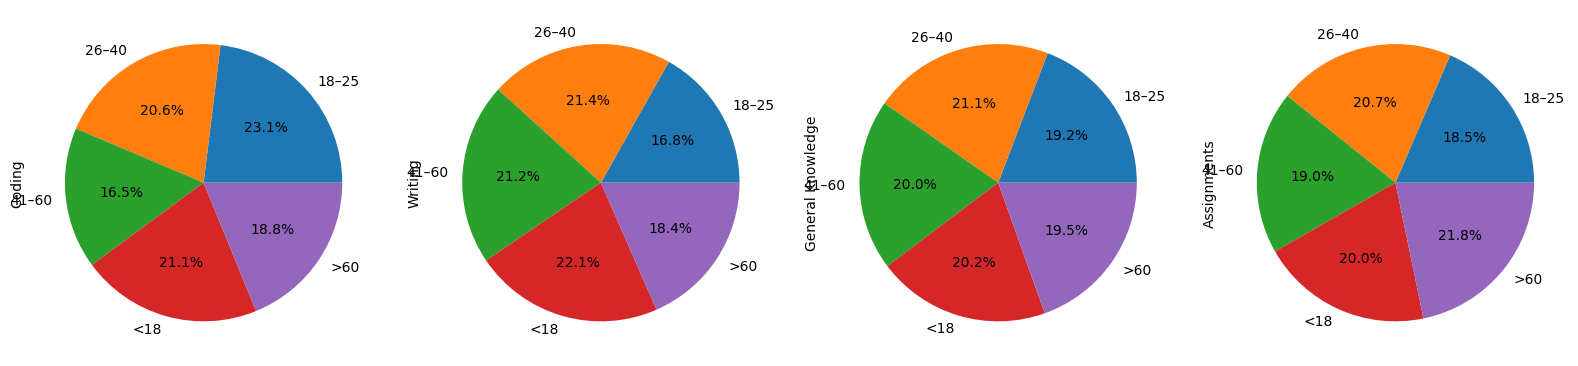

In [8]:
use_cases = ["Coding", "Writing", "General Knowledge", "Assignments"]
age_group_usage = data.groupby("Age Group")[use_cases].mean()

# Pie charts for use cases by age group
age_group_usage.plot(kind="pie", subplots=True, figsize=(16, 12), autopct='%1.1f%%', legend=False)
plt.tight_layout()
plt.show()
